*Ucitavanje podataka iz 'ekspresija.tsv' file-a.*

In [1]:
import pandas as pd
from functools import reduce
df = pd.read_table('/content/drive/MyDrive/Paralelni Algoritmi/Projekat 2/ekspresije.tsv', index_col=0)
data = [(cell, gene, value) for cell in df.columns 
                            for gene, value in df[cell].iteritems()]

#  1. Normalizacija unutar ćelija

- (1.1) Pomoću funkcije reduce odrediti srednju vrednost eksresija gena unutar svake ćelije.  
  Rezultat formirati kao niz tuple-ova (ćelija, srednja-vrednost). Poslednji element rezultata možete izmeniti nakon poziva funkcije reduce. **(1.5 bod)**



In [2]:
def srednja_vrednost(array, value):
  
  if array and array[-2][0] == value[0]:
    array[-1] = array[-1][0] + 1, array[-1][1] + value[2]
    
  else:
    if array:
      array[-2] = array[-2][0], array[-1][1] / array[-1][0]
      nextItem = value[0], value[2]
      array.insert(-1, nextItem)
      array[-1] = 0, 0
    else:
      x = value[0], value[2]
      y = (0, 0)
      array.append(x)
      array.append(y)
  return array
#(cell_0, 0),(0,0)
sred_v = reduce(srednja_vrednost, data, [])

#Rucno modifikovanje poslednje celije
sred_v[533] = sred_v[533][0], sred_v[534][1]/sred_v[534][0]

#brisanje pomocnog tupla
sred_v.pop()
print(sred_v[0])
print(sred_v[1])
print(sred_v[533])


('cell_0', 0.9210578251430827)
('cell_1', 0.596210775606868)
('cell_533', 0.6398263272153147)


- (1.2) Pomoću funkcije map izrvšiti centriranje vrednosti ekspresija oko srednje vrednosti unutar date ćelije.   
  Rezultat treba da bude niz tuple-ova (ćelija, gen, vrednost - srednja-vrednost-u-ćeliji).   
  Radi rešavanja ove tačke niz srednjih vrednosti iz prethodne tačke možete pretvoriti u mapu (dict). **(1 bod)**



In [3]:
def Convert(lst):
    res_dct = map(lambda i: (sred_v[i]), range(len(sred_v))[::1])
    return dict(res_dct)
sred_v_map = Convert(sred_v)
print(sred_v_map)

{'cell_0': 0.9210578251430827, 'cell_1': 0.596210775606868, 'cell_2': 0.7400828892835998, 'cell_3': 0.5745016775212157, 'cell_4': 0.87349516479179, 'cell_5': 0.5508190250641405, 'cell_6': 0.9321097296230512, 'cell_7': 0.612393921452536, 'cell_8': 1.0584172093941189, 'cell_9': 0.7803433984606276, 'cell_10': 0.61101243339254, 'cell_11': 0.5227945529899348, 'cell_12': 0.6471284783895797, 'cell_13': 0.6808762581409118, 'cell_14': 0.8959936846260115, 'cell_15': 0.7349516479179001, 'cell_16': 0.6344977304124728, 'cell_17': 0.7623840536806789, 'cell_18': 1.0744029998026445, 'cell_19': 0.8750740082889283, 'cell_20': 0.5857509374383264, 'cell_21': 0.7661338069863824, 'cell_22': 0.7722518255377936, 'cell_23': 0.5788434971383462, 'cell_24': 1.1444641799881587, 'cell_25': 1.3380698638247484, 'cell_26': 0.7002170909808565, 'cell_27': 0.6333135977896192, 'cell_28': 0.6183145845668048, 'cell_29': 0.6181172291296625, 'cell_30': 0.5206236431813697, 'cell_31': 0.6585750937438326, 'cell_32': 0.5806196960

In [4]:
sred_v_map = Convert(sred_v)
def center(array):
  global sred_v_map
  cell, gen, val = array
  x = sred_v_map[cell]

  return cell, gen, val - x


rez = map(center, data)
podaci = list(rez)
print(podaci[1])

('cell_0', 'HES4', -0.9210578251430827)


- (1.3) Pomoću funkije reduce odrediti odrediti varijansu ekspresija unutar svake ćelije, polazeći od rezultata iz prethodnog koraka.  
Rezultat treba da bude niz tuple-ova (ćelija, varijansa-vrednosti-u-ćeliji). Poslednji element rezultata možete izmeniti nakon poziva funkcije reduce. **(1 bod)**


In [5]:
import statistics

def varijansa(array, value):
  if array and array[-2][0] == value[0]:
    array[-1].append(value[2])
  else:
    if array:
      array[-2] = array[-2][0], statistics.variance(array[-1])
      nextItem = value[0], value[2]
      array.insert(-1, nextItem)
      array[-1] = []
    else:
      x = value[0], value[2]
      array.append(x)
      niz = []
      array.append(niz)
  return array

#[('cell_0', varijansa)[nizzzz]]
var = reduce(varijansa, podaci, [])

var[533] = var[533][0], statistics.variance(var[534])
var.pop()

print(var[0])
print(var[1])
print(var[533])

('cell_0', 27.070750716552947)
('cell_1', 14.778493337325632)
('cell_533', 9.93005981981207)


- (1.4) Pomoću funkcije map odrediti standardnu devijaciju ekspresija unutar svake ćelije, polazeći od niza varijansi iz tačke (1.3). Rezultat formirati kao niz tuple-ova (ćelija, standardna devijacija). **(0.5 bodova)**

In [6]:
import statistics

def devijacija(array, value):
  if array and array[-2][0] == value[0]:
    array[-1].append(value[2])
  else:
    if array:
      array[-2] = array[-2][0], statistics.stdev(array[-1])
      nextItem = value[0], value[2]
      array.insert(-1, nextItem)
      array[-1] = []
    else:
      x = value[0], value[2]
      array.append(x)
      niz = []
      array.append(niz)
  return array

dev = reduce(devijacija, podaci, [])

dev[533] = dev[533][0], statistics.stdev(dev[534])
dev.pop()

print(dev[0])
print(dev[1])
print(dev[533])

('cell_0', 5.2029559595054184)
('cell_1', 3.844280600752972)
('cell_533', 3.1511997429252356)


- (1.5) Pomoću funkcije map izrvšiti izvršiti stadnardizaciju vrednosti ekspresija unutar svake ćelije, polazeći od niza iz u tačke (1.2). Rezultat treba da bude niz tuple-ova (ćelija, gen, vrednost). Radi rešavanja ove tačke, rezultat  tačke (1.4) možete pretvoriti u mapu (dict). **(1 bod)**



In [7]:
def ConvertDev(lst):
    res_dct = map(lambda i: (dev[i]), range(len(dev))[::1])
    return dict(res_dct)
dev_map = ConvertDev(dev)
print(dev_map)

{'cell_0': 5.2029559595054184, 'cell_1': 3.844280600752972, 'cell_2': 4.003124745868939, 'cell_3': 3.1598618214258183, 'cell_4': 4.393538448991854, 'cell_5': 3.1463720923117036, 'cell_6': 4.992703830696962, 'cell_7': 3.3921468740121306, 'cell_8': 5.733396331932482, 'cell_9': 4.134878610272739, 'cell_10': 3.4943501154317187, 'cell_11': 3.1589087587046722, 'cell_12': 4.083153301579634, 'cell_13': 4.138134424577486, 'cell_14': 5.070334143665916, 'cell_15': 4.64000183915285, 'cell_16': 3.245364448869459, 'cell_17': 3.828382957336992, 'cell_18': 7.641505584214385, 'cell_19': 4.882429842814468, 'cell_20': 3.379050294936907, 'cell_21': 4.2566653930875065, 'cell_22': 3.7704352689556475, 'cell_23': 2.727282146788361, 'cell_24': 6.226198298062155, 'cell_25': 6.8690861055052785, 'cell_26': 4.5638781065814085, 'cell_27': 3.7138226418634677, 'cell_28': 3.5967212227795, 'cell_29': 3.879401320675987, 'cell_30': 2.765638334028539, 'cell_31': 3.192944468145885, 'cell_32': 3.23655519785881, 'cell_33': 4

In [8]:
dev_map = Convert(dev)

def normalizacija(array):
  cell, gen, val = array
  global sred_v_map
  global dev_map
  x_srednje = sred_v_map[cell]
  y_dev = dev_map[cell]

  z = (val - x_srednje) / y_dev
  return cell, gen, z
  


norm = map(normalizacija, data)
norm_podaci = list(norm)
print(norm_podaci[0])

('cell_0', 'NOC2L', -1.0)



### Defnicije operacija
- Centriranje vrednosti ekspresija oko srednje vrednosti niza: oduzimanje srednje vrednosti niza od svih elemenata niza
- Stadnardizacija vrednosti niza $z = \frac{x - x_{srednje}}{\sigma}$, pri čemu je $x_{srednje}$ srednja vrednost niza, a $\sigma$ standardna devijacija.

# 2. Nomralizacija vrednosti ekspresije gena

- (2.1) Pomoću funkija `map` i `reduce` odrediti varijansu ekspresija za svaki gen. Kao ulaz koristi niz kreiran u stavci (1.5), koji prethodno mozete sortirati po imenu gena. Možete primeniti istu skevencu koraka kao u tačkama 1.1-1.3 (računanje srednjih vrednosti, centriranje, pa varijansa).
Rezultat treba da bude niz tuple-ova (gen, varijansa-vrednosti-gena). Poslednji element rezultata možete izmeniti nakon poziva funkcije reduce. **1 bod**



In [9]:
gen_sort = sorted(norm_podaci, key=lambda x: x[1])
#print(gen_sort[1])

#RACNUNANJE SREDNJE VREDNOSTI
def srednja_gen(array, value):
  
  if array and array[-2][0] == value[1]:
    array[-1] = array[-1][0] + 1, array[-1][1] + value[2]
    
  else:
    if array:
      array[-2] = array[-2][0], array[-1][1] / array[-1][0]
      nextItem = value[1], value[2]
      array.insert(-1, nextItem)
      array[-1] = 0, 0
    else:
      x = value[1], value[2]
      y = (0, 0)
      array.append(x)
      array.append(y)
  return array
#(gen, 0),(0,0)
sred_v_gen = reduce(srednja_gen, gen_sort, [])

#Rucno modifikovanje poslednje celije
sred_v_gen[5067] = sred_v_gen[5067][0], sred_v_gen[5068][1]/sred_v_gen[5068][0]

#brisanje pomocnog tupla
sred_v_gen.pop()
print(sred_v_gen[5067])

('ZYX', -0.35206935940836237)


In [10]:
def ConvertSred(lst):
    res_dct = map(lambda i: (sred_v_gen[i]), range(len(sred_v_gen))[::1])
    return dict(res_dct)
sred_v_gen_map = ConvertSred(sred_v_gen)
print(sred_v_gen_map)

{'A1BG': -0.8717786897856303, 'AAAS': -0.893653661534666, 'AAED1': -0.8517356940448804, 'AAGAB': -0.9135306216347412, 'AAK1': -0.7459209326436116, 'AAMP': -0.6818817087795672, 'AASDHPPT': -0.8668357242721392, 'AATF': -0.687719964052554, 'ABCE1': -0.8695327011323968, 'ABCF1': -0.8329338405611179, 'ABCF3': -0.9229810371795721, 'ABHD11': -0.9091697826427734, 'ABHD12': -0.9081779341864191, 'ABHD13': -0.9132114334383754, 'ABHD14A': -0.7543870159128823, 'ABHD14B': -0.6815391827262438, 'ABHD17A': -0.8575072376801874, 'ABHD2': -0.9007840435120753, 'ABHD3': -0.8187442092080152, 'ABHD5': -0.9076653423851794, 'ABI1': -0.7092067675056691, 'ABI3': 0.15183778121236316, 'ABLIM1': -0.8819186663001274, 'ABR': -0.8723102473899601, 'ABRACL': 0.12351370846143006, 'ABT1': -0.4860415123174899, 'ABTB1': -0.7897253537647246, 'AC010642.1': -0.8000688328820169, 'AC092580.4': -0.8999626633494187, 'AC093673.5': -0.8995637130257547, 'ACAA1': -0.4879768246644106, 'ACAA2': -0.7264827744283006, 'ACADM': -0.8074117905

In [11]:
sred_v_gen_map = ConvertSred(sred_v_gen)
def center_gen(array):
  global sred_v_gen_map
  cell, gen, val = array
  x = sred_v_gen_map[gen]

  return cell, gen, val - x


rez_gen = map(center_gen, gen_sort)
podaci_gen = list(rez_gen)
print(podaci_gen[0])
print(podaci_gen[1])

('cell_0', 'A1BG', -0.12822131021436967)
('cell_1', 'A1BG', 1.5490378754857297)


In [12]:
import statistics

def varijansa_gen(array, value):
  if array and array[-2][0] == value[1]:
    array[-1].append(value[2])
  else:
    if array:
      array[-2] = array[-2][0], statistics.variance(array[-1])
      nextItem = value[1], value[2]
      array.insert(-1, nextItem)
      array[-1] = []
    else:
      x = value[1], value[2]
      array.append(x)
      niz = []
      array.append(niz)
  return array

#[(gen, varijansa)[nizzzz]]
var_gen = reduce(varijansa_gen, podaci_gen, [])

var_gen[5067] = var_gen[5067][0], statistics.variance(var_gen[5068])
var_gen.pop()

print(var_gen[0])
print(var_gen[1])
print(var_gen[5067])

('A1BG', 0.29946177512520794)
('AAAS', 0.18789458225331726)
('ZYX', 1.180323285121778)


- (2.2) Pomoću funckije `reduce` odrediti skup od 500 najvarijabilnijh gena. Kao ulaz koristi niz kreiran u stavci (2.1), koji možete prethodno sortirati standardnim metodama. **1 bod**


In [13]:
var_sort = sorted(var_gen, key=lambda x: x[1], reverse=True)
print(var_sort[0])
print(var_sort[1])
print(var_sort[501])
def top_gens(array, value):
  if array and len(array) < 500:
    array.append(value[0])
  elif(len(array) == 0):

    array.append(value[0])
  return array


top = reduce(top_gens, var_sort, [])
print(top)

('FTL', 7595.297283220023)
('FTH1', 5196.31646536942)
('CALCOCO2', 7.26290408627904)
['FTL', 'FTH1', 'LYZ', 'MALAT1', 'B2M', 'TMSB4X', 'S100A9', 'ACTB', 'CD74', 'RPL13', 'HLA-DRA', 'RPL13A', 'RPL10', 'RPS2', 'RPS6', 'RPS18', 'RPL3', 'CST3', 'RPS3', 'RPL19', 'RPS12', 'S100A8', 'MT-CO1', 'NKG7', 'S100A4', 'RPS19', 'RPL11', 'RPLP1', 'RPL32', 'RPS27', 'RPS27A', 'RPS14', 'TMSB10', 'MT-CO2', 'RPS3A', 'RPS4X', 'TPT1', 'HLA-DPB1', 'RPL10A', 'GNLY', 'RPL18A', 'TYROBP', 'RPS15A', 'EEF1A1', 'LTB', 'RPL12', 'RPS8', 'COTL1', 'RPL21', 'SAT1', 'RPL34', 'GNB2L1', 'RPS5', 'LST1', 'RPL23A', 'RPL28', 'RPLP2', 'RPSA', 'HLA-DPA1', 'RPL15', 'HLA-DRB1', 'HLA-C', 'RPS7', 'OAZ1', 'JUNB', 'CCL5', 'LGALS1', 'HLA-A', 'AIF1', 'RPL6', 'RPS9', 'RPL27A', 'RPL14', 'FCER1G', 'FOS', 'RPL7A', 'EIF1', 'RPL8', 'RPL18', 'S100A6', 'PTMA', 'GZMB', 'RPS16', 'RPL29', 'RPL9', 'RPL7', 'NACA', 'SH3BGRL3', 'ACTG1', 'VIM', 'PFN1', 'DUSP1', 'RPS15', 'RPL30', 'RPS23', 'RPL5', 'CTSS', 'CYBA', 'MT-CO3', 'FCN1', 'RPL26', 'GAPDH', 'ARPC3'

- (2.3) Pomoću funkcije `reduce` filtirati niz iz tačke (1.5) tako da sadrži samo gene koji se nalaze u 500 najvarijabilnijih gena. **1 bod**



In [14]:
def filter(array, value):
  global top
  if value[1] in top:
    array.append(value)
  return array
  


fil = reduce(filter, norm_podaci, [])

print(fil[0])

('cell_0', 'ISG15', -1.0)


In [ ]:
print(fil[21])

('cell_0', 'TXNIP', -1.0)


- (2.4) Sortirati niz kreiran u zadatku (2.3), tako da bude leksikografki sortiran po imenu gena (sve vrednosti izmerene za isti gen će se tako naći jedna do druge), a unutar jednog gena opadajuće po vrednosti normalizovane ekspresije.  
Rezultat treba da bude niz tuple-ova (ćelija, gen, vrednost).  
U okviru ove tačke možete koristi python funkciju `sorted`. 


In [16]:
fil_sort = sorted(fil, key=lambda x: x[1], )
print(fil_sort[0])

('cell_0', 'ABI3', -1.0)



- (2.5) Pomoću funkcije `reduce` izvršiti rank normalizaciju vrednosti unutar jednog gena (najmanja izmerena vrednost gena u bilo kojoj ćeliji će dobiti vrednost 1, sledeća 2 itd. Ako je za neki gen izmerena ista vrednost u dve ćelije, rang će biti ponovljen).  
Rezultat treba da bude niz tuple-ova (ćelija, gen, originalna-vrednost, rank-vrednost): **1.5 bod**


In [ ]:
def rank(array, value):
  print('hi')


rnk = reduce(rank, fil_sort, [])


- (2.6) Pomoću funkcije map izbaciti originalne vrednosti (pre rank normalizacije) iz niza iz tačke 2.2. **0.5 bodova**

# 3. K-means klasterovanje

- (3.1) Pomoću funkcije reduce grupisati vrednosti iz niza iz tačke (2.5) prema ćeliji.  
Rezultat treba da bude niz čiji su elementi tuple-ovi, takvi da je prvi element tuple-a identifikator ćelije, a drugi element niz vrednosti za sve gene izmerene u toj ćeliji.  
Vrednosti za različite gene moraju da se pojavljuju istim redosledom kod svih ćelija.: **2 boda**



- (3.2) Pomoću funkcija map i reduce implementriati k-means klasterovanje.  Klasterovati podatke u 2, 4, 6 i 10 klastera i prikazati rezultate bojenjem UMAP grafikona (UMAP kooridnate su date u posebnom fajlu).  
Nacrtati UMAP grafikone posle 1, 10 i 250 iteracija optimizacije **8 bodova**

Uz matricu vrednosti je data i matrica UMAP vrednosti za svaku ćeliju. UMAP možete učitati i nacrtati sledećim kodom:



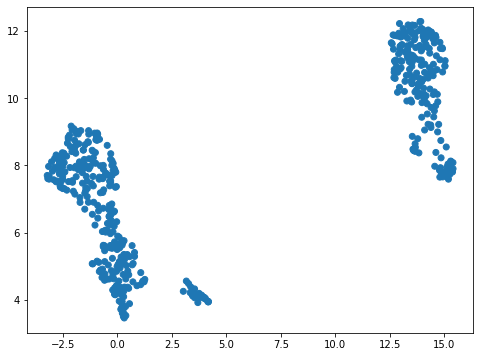

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

embedding = pd.read_table('/content/drive/MyDrive/Paralelni Algoritmi/Projekat 2/umap.tsv')
embedding['cluster'] = 0
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)

U sklopu zataka će biti potrebni odrediti klastere kojima ćelije pripadaju, pa će linija:
```python
embedding['cluster'] = 0
```
Biti zamenjena linijom koja upisu izračunate klastere. Na primer, ako imamo map oblika `klasteri = {'cell_id': 'cluster_id'}`:
```python
embedding['cluster'] = embedding.cell.map(klasteri)
```

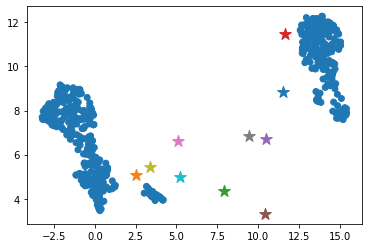

In [ ]:
from functools import reduce
k = 10
#np.random.seed(7)
centroids = np.random.uniform(2, 12, (k, 2))


# Da pogledamo rezultat
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)
for c in centroids:
  plt.scatter(*c, marker='*', s=150)



In [ ]:
cell = np.array(embedding.cell)
tp = np.array(embedding.umap1)
fp = np.array(embedding.umap2)
v = np.vstack((tp, fp)).T
combined = np.vstack((cell, tp, fp)).T

{'cell_0': 3, 'cell_1': 3, 'cell_10': 1, 'cell_100': 1, 'cell_101': 1, 'cell_102': 0, 'cell_103': 1, 'cell_104': 3, 'cell_105': 1, 'cell_106': 1, 'cell_107': 1, 'cell_108': 0, 'cell_109': 3, 'cell_11': 1, 'cell_110': 1, 'cell_111': 1, 'cell_112': 1, 'cell_113': 0, 'cell_114': 3, 'cell_115': 3, 'cell_116': 9, 'cell_117': 8, 'cell_118': 1, 'cell_119': 1, 'cell_12': 3, 'cell_120': 1, 'cell_121': 3, 'cell_122': 3, 'cell_123': 1, 'cell_124': 3, 'cell_125': 3, 'cell_126': 1, 'cell_127': 1, 'cell_128': 0, 'cell_129': 1, 'cell_13': 1, 'cell_130': 1, 'cell_131': 1, 'cell_132': 1, 'cell_133': 1, 'cell_134': 1, 'cell_135': 1, 'cell_136': 3, 'cell_137': 3, 'cell_138': 1, 'cell_139': 1, 'cell_14': 1, 'cell_140': 3, 'cell_141': 3, 'cell_142': 1, 'cell_143': 3, 'cell_144': 3, 'cell_145': 1, 'cell_146': 3, 'cell_147': 1, 'cell_148': 1, 'cell_149': 3, 'cell_15': 1, 'cell_150': 1, 'cell_151': 1, 'cell_152': 1, 'cell_153': 3, 'cell_154': 1, 'cell_155': 1, 'cell_156': 8, 'cell_157': 1, 'cell_158': 1, 'cel

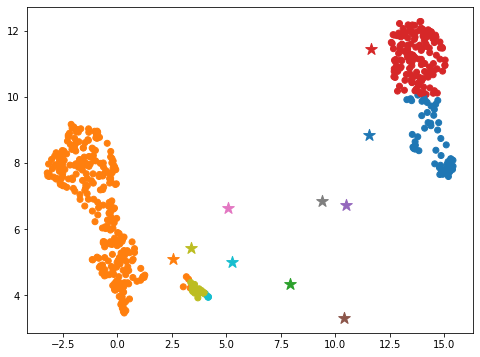

In [ ]:
def calculate(array, value):
  global centroids
  vrednost = np.vstack((value[1], value[2])).T
  distance = np.sqrt(((centroids - vrednost)**2).sum(axis=1))
  rez = value[0], np.argmin(distance)
  array.append(rez)
  return array

cl = reduce(calculate, combined, [])

def ConvertKlasteri(lst):
    res_dct = map(lambda i: (cl[i]), range(len(cl))[::1])
    return dict(res_dct)
klasteri = ConvertKlasteri(cl)
print(klasteri)

embedding['cluster'] = embedding.cell.map(klasteri)
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

print(embedding)

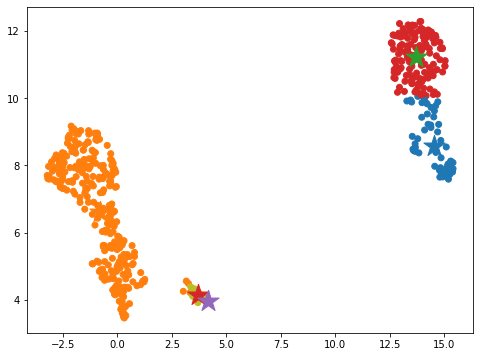

In [ ]:
cl_sort = embedding.sort_values(by=['cluster'])
niz = cl_sort.to_numpy()

def move_centroids(array, value):
  if array and array[-1][3] == value[3]:
    array[-1] = array[-1][0] + 1, array[-1][1] + value[1], array[-1][2] + value[2], value[3]
  else:
    if array:
      array[-2] = array[-1][1] / array[-1][0], array[-1][2] / array[-1][0]
      nextItem = 0, 0
      array.insert(-1, nextItem)
      array[-1] = 1, value[1], value[2], value[3]
    else:
      x = 0, 0
      y = 1, value[1], value[2], value[3]
      array.append(x)
      array.append(y)
  return array


new = reduce(move_centroids, niz, [])
#(nova_x, nova_y)(kolko_ih_ima, zbir_x, zbir_y, cluster)
new[-2] = new[-1][1] / new [-1][0], new[-1][2] / new [-1][0]
new.pop()
centroids = np.asarray(new)

plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)
for c in centroids:
  plt.scatter(*c, marker='*', s=500)


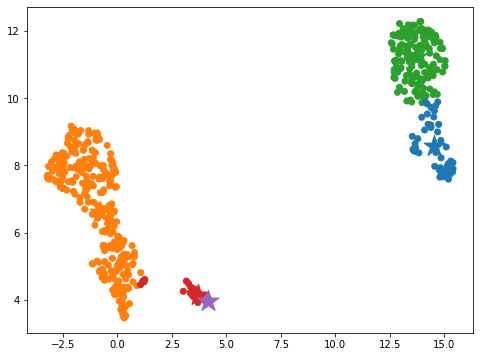

In [ ]:
cl = reduce(calculate, combined, [])
klasteri = ConvertKlasteri(cl)

embedding['cluster'] = embedding.cell.map(klasteri)

plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)
for c in centroids:
  plt.scatter(*c, marker='*', s=500)

***Ponavljanje***

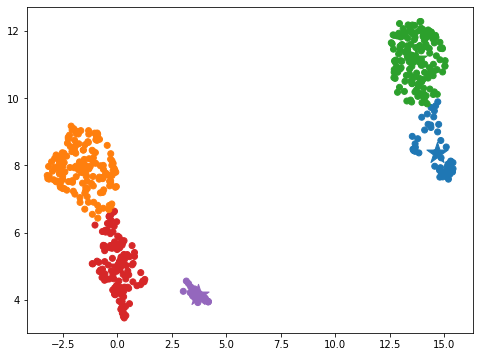

In [ ]:
for _ in range(200):
  #Calculate cluster
  cl = reduce(calculate, combined, [])
  klasteri = ConvertKlasteri(cl)
  embedding['cluster'] = embedding.cell.map(klasteri)

  cl_sort = embedding.sort_values(by=['cluster'])
  niz = cl_sort.to_numpy()

  #Center stars
  new = reduce(move_centroids, niz, [])
  new[-2] = new[-1][1] / new [-1][0], new[-1][2] / new [-1][0]
  new.pop()
  centroids = np.asarray(new)

plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster]
)
for c in centroids:
  plt.scatter(*c, marker='*', s=500)